In [9]:
#!pip install --user seaborn
#!pip install --user matplotlib

RocketML text topic modeling using SVD
==========================

**Import Libraries**

In [34]:
from rocketml.io import DocumentSet
from rocketml.decomposition import TruncatedSVD
from rocketml.preprocessing import TextFilter
from rocketml import Pipeline
import sys

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.ranges import Range1d
from bokeh.models import LabelSet

%matplotlib inline

In [35]:
print('Seaborn Version: '+str(sns.__version__))
print('Pandas Version: '+str(pd.__version__))
print('Matplotlib Version: '+str(matplotlib.__version__))

Seaborn Version: 0.9.0
Pandas Version: 0.23.1
Matplotlib Version: 2.2.3


Create Document Set
-----------

In [83]:
file_location='/home/ubuntu/deepspeech'

Preview a text file

In [84]:
preview=pd.read_csv(file_location+"/rank_0-12_sec_mono_16bit-wav-data.txt",delimiter=' ', header=None).transpose()
preview.columns=['words']
preview.head(n=15)

,words
0,the
1,time
2,machine
3,chapter
4,ten
5,about
6,eight
7,or
8,ninte
9,in


Add list of files to be analyzed for term frequency.

In [86]:
filelist = [file_location+"/rank_0-12_sec_mono_16bit-wav-data.txt",\
            file_location+"/rank_0-FrankMS-01_mono_16bit.wav-data.txt",\
            file_location+"/rank_0-FrankMS-02_mono_16bit.wav-data.txt",\
            file_location+"/rank_0-FrankMS-06_mono_16bit.wav-data.txt",\
            file_location+"/rank_0-FrankMS-05_mono_16bit.wav-data.txt",\
            file_location+"/rank_0-startalk_mono_16000.wav-data.txt"]
docset = DocumentSet(filelist=filelist)
print('Documents to be analyzed: ',len(docset.documents))

('Documents to be analyzed: ', 6)


Filter out stop words, stemming, and length

In [87]:
tf = TextFilter(stop_word_filter=True,stemming_filter=True,length_filter=True)

Apply Single Value Decomposition to filtered text files

In [88]:
svd = TruncatedSVD()
pipeline = Pipeline([tf,svd])
pipeline.fit(docset)

text
------------------
Cluster Resources
------------------
Nodes        = 2
Sockets/node = 2
Cores/socket = 1
--------------------------
Total Cores    = 4
Total Memory(GB)   = 7.71
--------------------------
/shared/jobs_folder/6ca20288/output.txt


In [89]:
#docset = DocumentSet(filename=filename)
docset_transform = pipeline.fit_transform(docset)

text
------------------
Cluster Resources
------------------
Nodes        = 2
Sockets/node = 2
Cores/socket = 1
--------------------------
Total Cores    = 4
Total Memory(GB)   = 7.71
--------------------------
/shared/jobs_folder/6ca20288/output.txt


**Plot Singular Values**

Text(0.5,1,'Single Value Decomposition')

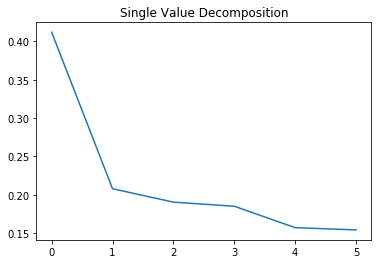

In [90]:
#sns.tsplot(svd.singular_values_)
plt.plot(svd.singular_values_)
plt.title('Single Value Decomposition')

**Check term frequencies**

Showing the top 10% frequencies

In [91]:
term_freq = pd.DataFrame([[key,value] for key,value in docset.terms_document_frequencies.iteritems()],columns=["Term","Frequency"])
term_freq.sort_values(by='Frequency',ascending=False).head(n=int(len(term_freq)*.1))

,Term,Frequency
392,mor,3
118,farm,2
13,father,2
353,il,2
33,ten,2
473,ar,2
272,fear,2
54,mer,2
74,famili,2
84,morn,2


In [112]:
print('The top 10% frequency has ',len(term_freq)*.1,'values.')

('The top 10% frequency has ', 49.5, 'values.')


In [93]:
output_notebook()

Loading BokehJS ...

Selecting items greater than the median.

In [94]:
df_high = term_freq[term_freq["Frequency"] > int(term_freq.median().item())].sort_values(by=["Frequency"],ascending=False)

In [95]:
source = ColumnDataSource(df_high)

In [96]:
df_high

,Term,Frequency
392,mor,3
3,yellow,2
272,fear,2
486,gon,2
485,er,2
473,ar,2
428,chapter,2
424,bu,2
389,har,2
353,il,2


Plot values text frequencies greater than the median

In [97]:
p = figure(plot_width=1000,plot_height=500,title="Term Frequencies",x_range=df_high["Term"].values,y_range=Range1d(0,df_high["Frequency"].max()))
p.vbar(x="Term",top = "Frequency",width=0.2,source=source)

labels = LabelSet(x="Term", y="Frequency", text="Frequency",
        x_offset=0, y_offset=0, source=source, render_mode='canvas')

p.add_tools(HoverTool(tooltips=[("Term","@Term"),("Frequency","@Frequency")]))
p.add_layout(labels)
show(p)

In [98]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from bokeh.palettes import Category20

Run K-Means on Word Frequencies
-----

Selecting clusters

In [99]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)

Fit K-means

In [100]:
kmeans.fit(docset_transform)
#kmeans.fit(docset)
y_kmeans = kmeans.predict(docset_transform)
#y_kmeans = kmeans.predict(docset)

Seperate clusters into colors and display color list

In [101]:
colors_list = []
for yk in y_kmeans:
    colors_list.append(Category20[20][yk])
#colors_list

In [107]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, ColorBar
from bokeh.models import LabelSet
from bokeh.transform import linear_cmap

x = range(0,len(colors_list))
y = range(0,len(colors_list))

#Use the field name of the column source
mapper = linear_cmap(field_name='y', palette=colors_list ,low=min(y) ,high=max(y))
source = ColumnDataSource(dict(x=x,y=y,names=colors_list))

p = figure(plot_width=300, plot_height=300,title="Linear Color Map Based on Y-Outcome")
p.circle(x='x', y='y', line_color=mapper,color=mapper, fill_alpha=1, size=12, source=source)

labels = LabelSet(x='x', y='y', text='names', level='glyph',
              x_offset=3, y_offset=3, source=source, render_mode='canvas')

color_bar = ColorBar(color_mapper=mapper['transform'], width=8,  location=(0,0))
p.add_layout(color_bar, 'right')
p.add_layout(labels)
show(p)

In [108]:
source = ColumnDataSource(term_freq)

In [109]:
#docset_transform[:,0]

In [110]:
#docset_transform[:,1]

In [111]:
p1 = figure(plot_width=1000,plot_height=500,tools="pan,wheel_zoom,box_zoom,reset,hover",title="Plotting Clusters: Colors Representing Like Values")
p1.scatter(docset_transform[:,0],docset_transform[:,1],color=colors_list)
show(p1)